# perceptron trick

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
X, y=make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,
                    random_state=41, hypercube=False, class_sep=30)

In [3]:
df=pd.DataFrame()

In [4]:
df[["x", "y"]]=X

In [5]:
df

,x,y
0,0.823215,-0.116976
1,0.375148,-0.731152
2,0.269478,-0.708106
3,-4.987449,-2.011992
4,0.423128,1.634932
...,...,...
95,-5.519911,0.661988
96,-4.932582,0.071533
97,-4.856931,0.323236
98,1.460234,-0.345742


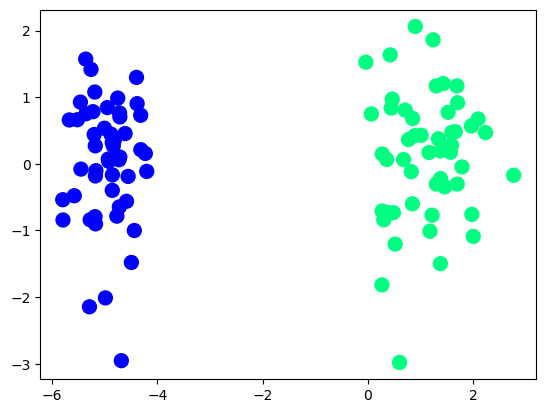

In [6]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=100)

In [7]:
def step(z):
    return 1 if z>0 else 0

In [8]:
def perceptron(X, y):
    
    X=np.insert(X, 0, 1, axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j], weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]
        
    return weights[0], weights[1:]

In [9]:
intercept_, coef_=perceptron(X, y)

In [10]:
print(intercept_)
print(coef_)

1.3000000000000003
[1.1134548  0.33857969]


In [11]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [12]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.5, 2.5)

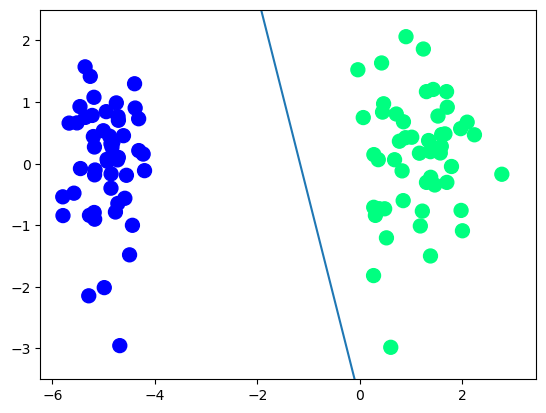

In [13]:
plt.figure()
plt.plot(x_input, y_input)
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=100)
plt.ylim(-3.5, 2.5)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lor=LogisticRegression()

In [16]:
lor.fit(X, y)

LogisticRegression()

In [17]:
m=-(lor.coef_[0][0]/lor.coef_[0][1])
b=-(lor.intercept_/lor.coef_[0][1])

In [18]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input+b

(-3.5, 2.5)

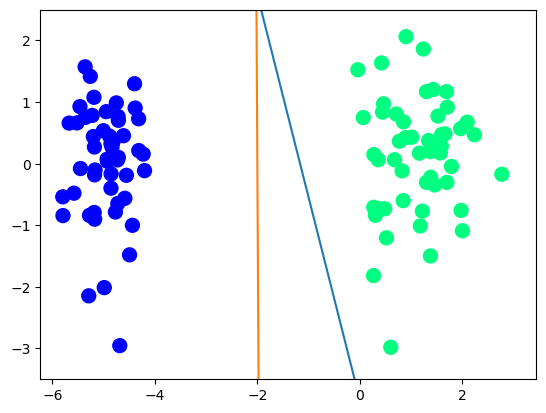

In [19]:
plt.figure()
plt.plot(x_input, y_input)
plt.plot(x_input1, y_input1)
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=100)
plt.ylim(-3.5, 2.5)

# Sigmoid Function

In [20]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [21]:
def perceptron(X, y):
    
    X=np.insert(X, 0, 1, axis=1)
    weights=np.ones(X.shape[1])
    lr=0.1
    
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=sigmoid(np.dot(X[j], weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]
        
    return weights[0], weights[1:]

In [22]:
intercept_, coef_=perceptron(X, y)

In [23]:
print(intercept_)
print(coef_)

2.467492989007484
[2.33259242 0.26061631]


In [24]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [25]:
x_input2=np.linspace(-3,3,100)
y_input2=m*x_input+b

(-3.5, 2.5)

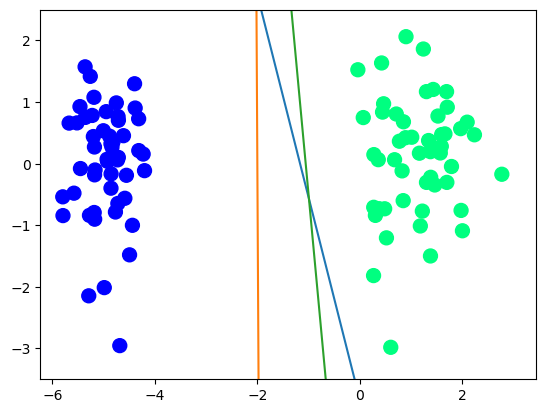

In [26]:
plt.figure()
plt.plot(x_input, y_input)
plt.plot(x_input1, y_input1)
plt.plot(x_input2, y_input2)
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=100)
plt.ylim(-3.5, 2.5)

# Gradient Descent for Logistic Regression code from Scratch

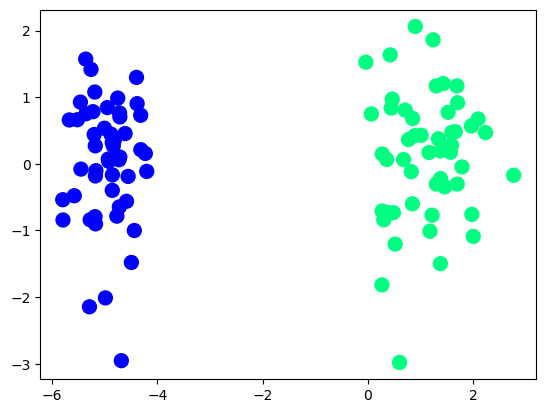

In [27]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=100)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logr=LogisticRegression(penalty=None, solver="sag")

In [30]:
logr.fit(X, y)

LogisticRegression(penalty=None, solver='sag')

In [31]:
print(logr.coef_)
print(logr.intercept_)

[[4.00172164 0.17580729]]
[4.15035612]


In [32]:
m1=-(logr.coef_[0][0]/logr.coef_[0][1])
b1=-(logr.intercept_[0]/logr.coef_[0][1])

In [33]:
X_input=np.linspace(-3,3,100)
y_input=m1*X_input+b1

In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [35]:
def MeraGD(X, y):
    
    X=np.insert(X,0,1, axis=1)
    weights=np.ones(X.shape[1])
    lr=0.5
    
    for i in range(10000):
        y_hat=sigmoid(np.dot(X, weights))
        weights=weights+lr*(np.dot((y-y_hat), X)/X.shape[0])
    
    return weights[1:], weights[0]

In [36]:
coef_, intercept_ = MeraGD(X, y)

In [37]:
print(coef_)
print(intercept_)

[3.72742137 0.15007352]
5.700575226218901


In [38]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [39]:
X_input1=np.linspace(-3,3,100)
y_input1=m*X_input1+b

(-3.0, 2.0)

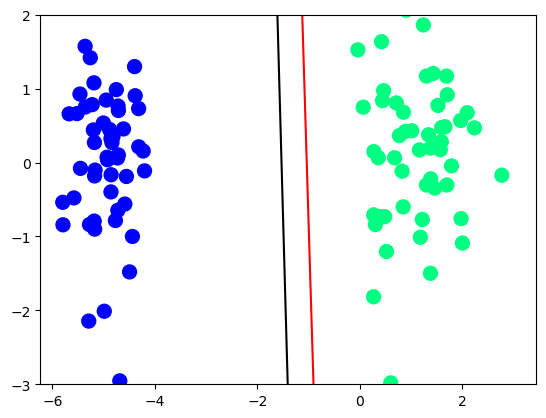

In [40]:
plt.figure()
plt.plot(X_input, y_input, color="red")
plt.plot(X_input1, y_input1, color="black")
plt.scatter(X[:,0], X[:,1], c=y, cmap="winter", s=100)
plt.ylim(-3,2)

# Accuracy and Confusion Matrix | Type 1 and Type 2 Errors | Classification Metrics

In [41]:
df=pd.read_csv(r"C:\Users\joshi\Downloads\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,0:-1], df.iloc[:, -1], test_size=0.2, random_state=4)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [46]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [49]:
accuracy_score(y_test, y_pred1) #lr accuracy

0.8390243902439024

In [50]:
accuracy_score(y_test, y_pred2) #rfc accuracy

1.0

In [51]:
print(classification_report(y_test, y_pred1)) #lr classification Report

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       107
           1       0.77      0.94      0.85        98

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



In [52]:
print(classification_report(y_test, y_pred2)) #rfc classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        98

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [53]:
print(confusion_matrix(y_test, y_pred1)) # lr confusion_matrix

[[80 27]
 [ 6 92]]


In [54]:
print(confusion_matrix(y_test, y_pred2)) # rfc confusion_matrix

[[107   0]
 [  0  98]]


# For multiclass classification

In [55]:
df=pd.read_csv(r"C:\Users\joshi\mnist.csv")
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2, random_state=4)

In [57]:
lr=LogisticRegression()

In [58]:
lr.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred=lr.predict(X_test)

In [60]:
accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

(<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>,
 <function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

In [61]:
accuracy_score(y_test, y_pred)

0.8825

In [62]:
confusion_matrix(y_test, y_pred)

array([[170,   0,   1,   0,   0,   3,   1,   1,   0,   1],
       [  0, 209,   3,   0,   0,   1,   2,   0,   4,   0],
       [  0,   1, 148,   4,   5,   4,   4,   7,   7,   2],
       [  0,   0,   6, 176,   0,   8,   0,   4,   6,   1],
       [  2,   0,   3,   1, 190,   0,   5,   1,   2,   8],
       [  6,   0,   1,   7,   4, 165,   4,   1,  13,   2],
       [  3,   0,   3,   1,   2,   5, 188,   2,   1,   0],
       [  1,   0,   5,   5,   5,   0,   0, 169,   2,  13],
       [  1,   6,   3,   4,   1,   9,   5,   1, 163,   0],
       [  0,   2,   2,   1,   7,   1,   0,   6,   2, 187]])

In [63]:
precision_score(y_test, y_pred, average="weighted")

0.8823432677109847

In [64]:
recall_score(y_test, y_pred, average="weighted")

0.8825

In [65]:
f1_score(y_test, y_pred, average="weighted")

0.8822500425969096

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       177
           1       0.96      0.95      0.96       219
           2       0.85      0.81      0.83       182
           3       0.88      0.88      0.88       201
           4       0.89      0.90      0.89       212
           5       0.84      0.81      0.83       203
           6       0.90      0.92      0.91       205
           7       0.88      0.84      0.86       200
           8       0.81      0.84      0.83       193
           9       0.87      0.90      0.89       208

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



# Softmax Regression (Multiclass classification)

In [67]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [68]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [69]:
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])

In [70]:
df=df[["sepal_length", "petal_length", "species"]]
df

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [71]:
X=df.iloc[:,0:2]
y=df.iloc[:,2]

In [72]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=4)

In [73]:
lr=LogisticRegression(multi_class="multinomial")
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [74]:
y_pred=lr.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [76]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

In [77]:
query=np.array([[3.4, 2.7]])
lr.predict_proba(query)

array([[8.19505764e-01, 1.80186361e-01, 3.07874871e-04]])

In [78]:
lr.predict(query)

array([0])

In [79]:
!pip install mlxtend

In [80]:
from mlxtend.plotting import plot_decision_regions

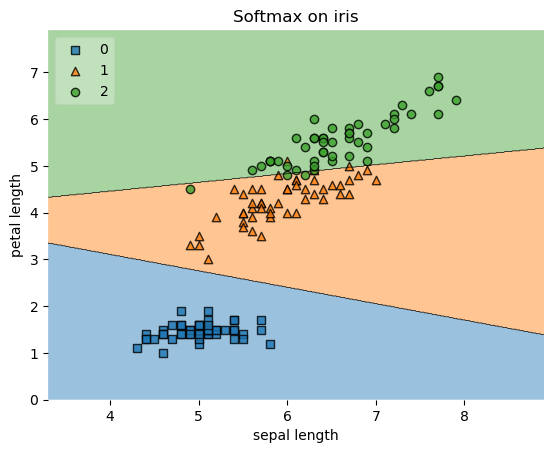

In [81]:
plot_decision_regions(X.values, y.values, lr, legend=2)
plt.title("Softmax on iris")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.show()

# Polynomial Features in Logistic Regression | Non Linear Logistic Regression 